In [472]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [473]:
# load dataset

original_dataset = pd.read_csv("bengaluru_house_prices.csv")
df = original_dataset.copy()

In [474]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [476]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [477]:
df.shape

(13320, 9)

In [478]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [479]:
df[df.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


In [480]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [481]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [482]:
df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns', inplace=True)

In [483]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [484]:
# handle the missing values

df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

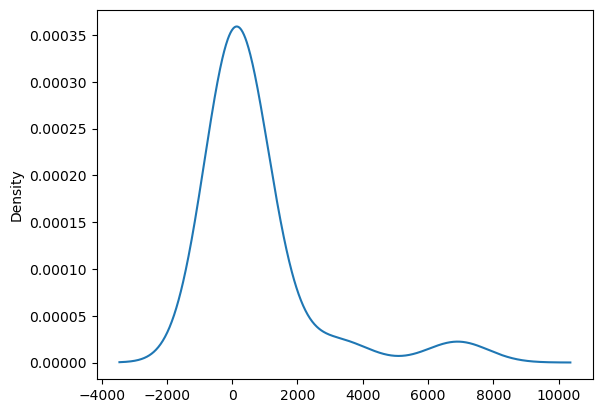

In [485]:
df['bath'].value_counts().plot(kind='kde')
plt.show()

In [486]:
# Note: the null values are less in number compared to the total rows
# so we can even drop these rows.

df.dropna(axis=0, inplace=True)

In [487]:
# check the null values again

df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [488]:
# no null values

In [489]:
df['size']= df['size'].str.replace("Bedroom", 'BHK')

In [490]:
df['size'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '1 RK', '8 BHK',
       '7 BHK', '5 BHK', '11 BHK', '9 BHK', '27 BHK', '10 BHK', '19 BHK',
       '16 BHK', '43 BHK', '14 BHK', '12 BHK', '13 BHK', '18 BHK'],
      dtype=object)

In [491]:
# remove the word BHK

df['size'] = df['size'].str.split().str[0]
df['size'].value_counts()

size
2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: count, dtype: int64

In [492]:
df['size'].dtype

dtype('O')

In [493]:
# change data type of col 'size'

df['size']=df['size'].astype('int')
print(df['size'].dtype)

int64


In [494]:
df[df['size']>20]

,location,size,total_sqft,bath,price
1718,2Electronic City Phase II,27,8000,27.0,230.0
4684,Munnekollal,43,2400,40.0,660.0


In [495]:
# These two cols seem to have large area in sq fee

In [496]:
df['total_sqft'].dtype

dtype('O')

In [497]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True 

In [498]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [499]:
# convert the col: total_sqft into num so that I can also calculate the average area

def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [500]:
convert_sqft_to_num("100 - 200")

150.0

In [501]:
convert_sqft_to_num("300")

300.0

In [502]:
convert_sqft_to_num("300sq.meter")

In [503]:
# apply the above function

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

In [504]:
df['total_sqft'].head()

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float64

In [505]:
df['total_sqft'].dtype

dtype('float64')

In [506]:
# feature engineering
# calculating the price per square feet 

df['price_per_sqft'] = df['price']*100000 / df['total_sqft']

In [507]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [508]:
df['location'].nunique()

1304

In [509]:
df['location'].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [510]:
# df.location = df.location.apply(lambda x: x.split())

In [514]:
df.groupby('location')['location'].count().sort_values(ascending=False)

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [515]:
df['location'] = df['location'].str.replace("whitefiled", "Whitefield")

In [517]:
df['location'] = df['location'].str.replace("Kanakapura  Rod", "Kanakpura Road")

In [520]:
df['location'] = df['location'].str.replace("Kanakapur main road", "Kanakpura Road")

In [523]:
df['location'] =df['location'].str.replace("Kanakapura Main Road", "Kanakpura Road")

In [524]:
df.groupby('location')['location'].count().sort_values(ascending=False)

location
Whitefield              535
Sarjapur  Road          392
Electronic City         302
Kanakpura Road          269
Thanisandra             233
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kanakadasa Layout         1
white field,kadugodi      1
Name: location, Length: 1300, dtype: int64

In [525]:
df['location'].value_counts()

location
Whitefield                   535
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               269
Thanisandra                  233
                            ... 
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Brigade Road                   1
Maruthi HBCS Layout            1
Abshot Layout                  1
Name: count, Length: 1300, dtype: int64